In [161]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [162]:
data = pd.read_csv('Datasets/STS.csv')
# show the first 5 rows of the data
data.head()

,Index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AverageScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.00
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88,82.33
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.33
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42,47.67
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75,76.33


In [163]:
# Drop Index, MathScore, ReadingScore, WritingScore
data = data.drop(['Index', 'MathScore', 'ReadingScore', 'WritingScore'], axis=1)
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,AverageScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,72.00
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,82.33
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,90.33
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,47.67
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76.33


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  AverageScore         30641 non-null  float64
dtypes: float64(2), object(10)
memory usage: 2.8+ MB


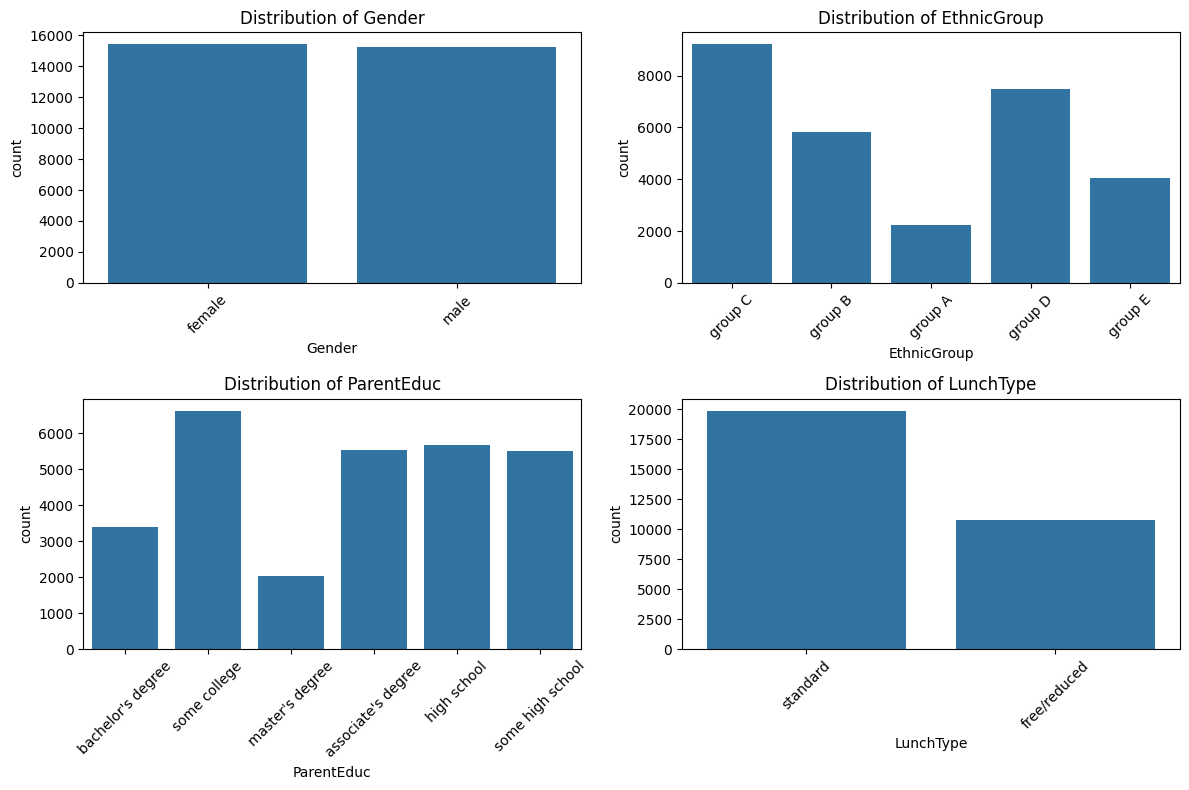

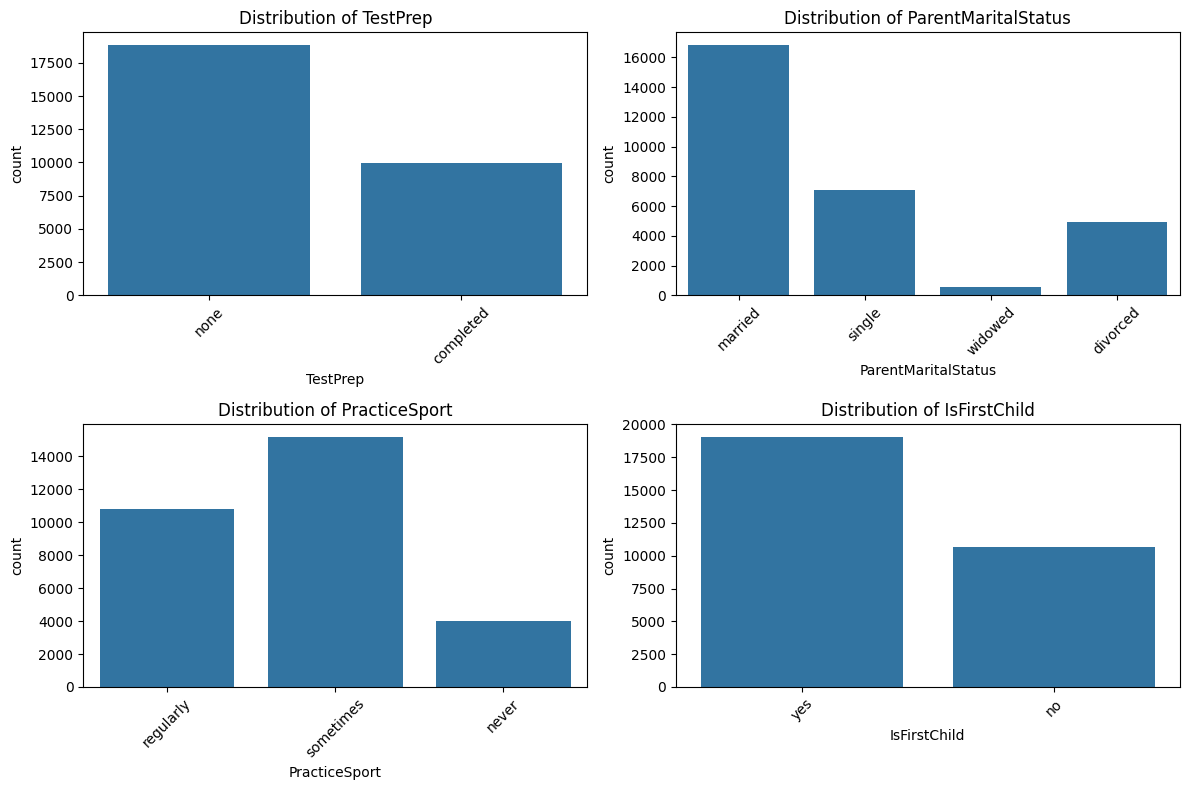

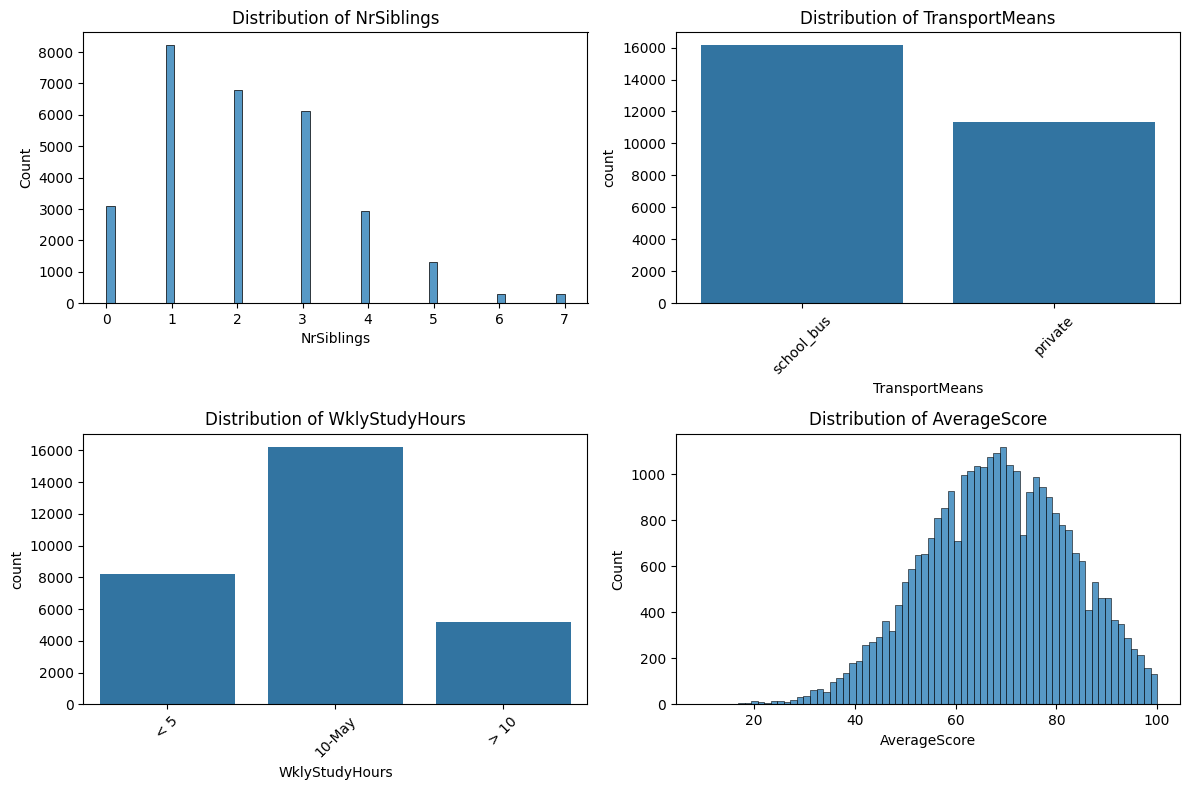

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of columns per row in the grid
columns_per_row = 2

# Divide the data columns into groups of 4
column_groups = [data.columns[i:i+columns_per_row*2] for i in range(0, len(data.columns), columns_per_row*2)]

# Loop through each group and create a figure with subplots
for group_idx, group in enumerate(column_groups):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    
    # Flatten the axs array to iterate over it easily
    axs = axs.flatten()
    
    # Loop through the columns in the group and plot them
    for i, column in enumerate(group):
        if i < len(group):
            if data[column].dtype == 'object':
                sns.countplot(x=column, data=data, ax=axs[i])
                axs[i].set_title(f'Distribution of {column}')
                axs[i].tick_params(axis='x', rotation=45)
            else:
                sns.histplot(data[column], ax=axs[i])
                axs[i].set_title(f'Distribution of {column}')
        else:
            axs[i].axis('off')  # Turn off empty subplots if the group has fewer than 4 columns
            
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [166]:
# Check for missing values
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
AverageScore              0
dtype: int64

In [167]:
# Fill missing values with the most frequent value
data = data.fillna(data.mode().iloc[0])
data.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
AverageScore           0
dtype: int64

In [168]:
# Check for duplicates
data.duplicated().sum()

132

In [169]:
# # Drop duplicates
data = data.drop_duplicates()
data.duplicated().sum()

0

In [170]:
# One hot encode the categorical features
# data = pd.get_dummies(data)
# data.head()

In [171]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in cat_cols:
    data[col] = lb.fit_transform(data[col])

In [172]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,AverageScore
0,0,2,1,1,1,1,1,1,3.0,1,1,72.00
1,0,2,4,1,1,1,2,1,0.0,1,0,82.33
2,0,1,3,1,1,2,2,1,4.0,1,1,90.33
3,1,0,0,0,1,1,0,0,1.0,1,0,47.67
4,1,2,4,1,1,1,2,1,0.0,1,0,76.33


In [173]:
# build neural network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = data.drop(['AverageScore'], axis=1)
y = data['AverageScore']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build the neural network
model = Sequential()

# 3 layers with 64, 32, 16 neurons each
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(1))  # Output layer for regression

model.compile(loss='mean_squared_error', optimizer='adam')

In [176]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
763/763 [==============================] - 2s 2ms/step - loss: 1021.3284
Epoch 2/30
763/763 [==============================] - 1s 1ms/step - loss: 295.5003
Epoch 3/30
763/763 [==============================] - 1s 1ms/step - loss: 284.4368
Epoch 4/30
763/763 [==============================] - 1s 1ms/step - loss: 281.5067
Epoch 5/30
763/763 [==============================] - 1s 2ms/step - loss: 276.2161
Epoch 6/30
763/763 [==============================] - 1s 2ms/step - loss: 269.0325
Epoch 7/30
763/763 [==============================] - 1s 1ms/step - loss: 260.8977
Epoch 8/30
763/763 [==============================] - 1s 1ms/step - loss: 260.0804
Epoch 9/30
763/763 [==============================] - 1s 2ms/step - loss: 257.7942
Epoch 10/30
763/763 [==============================] - 1s 1ms/step - loss: 255.0979
Epoch 11/30
763/763 [==============================] - 1s 1ms/step - loss: 252.5460
Epoch 12/30
763/763 [==============================] - 1s 2ms/step - loss: 251.9958


In [177]:
# Make predictions
y_pred = model.predict(X_test)

191/191 [==============================] - 0s 1ms/step


In [178]:
# reshape the predictions
y_pred = y_pred.reshape(y_pred.shape[0])

In [179]:
# Evaluate the model
print('Root Mean Squared Error:', f'{np.sqrt(np.mean((y_test - y_pred) ** 2)):,.2f}')
print('Mean Absolute Error:', f'{np.mean(np.abs(y_test - y_pred)):,.2f}')

Root Mean Squared Error: 13.01
Mean Absolute Error: 10.59


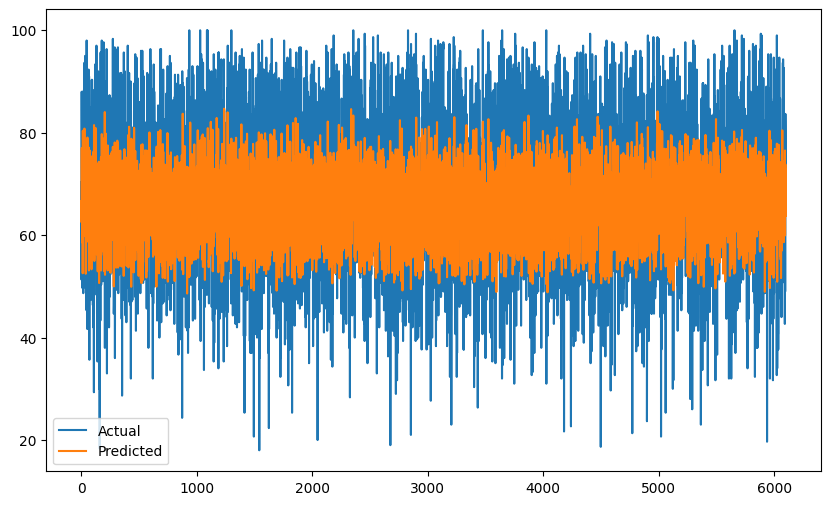

In [180]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [181]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

# Build the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [182]:
# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [183]:
# Make predictions
y_pred = rf.predict(X_test)

In [184]:
# Evaluate the model
print('Root Mean Squared Error:', f'{np.sqrt(np.mean((y_test - y_pred) ** 2)):,.2f}')
print('Mean Absolute Error:', f'{np.mean(np.abs(y_test - y_pred)):,.2f}')

Root Mean Squared Error: 13.89
Mean Absolute Error: 11.22


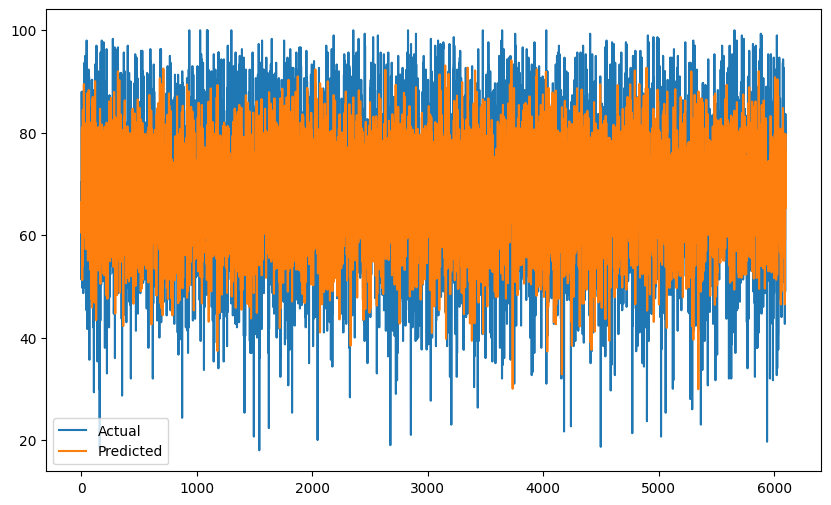

In [185]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [186]:
# XGBoost
from xgboost import XGBRegressor

# Build the model
xgb = XGBRegressor(n_estimators=100, random_state=42)

In [187]:
# Train the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [188]:
# Make predictions
y_pred = xgb.predict(X_test)

In [189]:
# Evaluate the model
print('Root Mean Squared Error:', f'{np.sqrt(np.mean((y_test - y_pred) ** 2)):,.2f}')
print('Mean Absolute Error:', f'{np.mean(np.abs(y_test - y_pred)):,.2f}')

Root Mean Squared Error: 12.78
Mean Absolute Error: 10.41


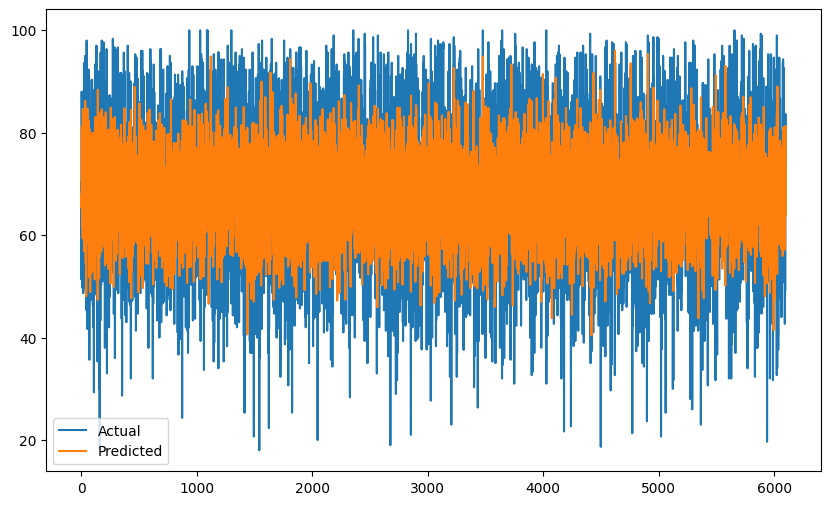

In [190]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()